In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Test

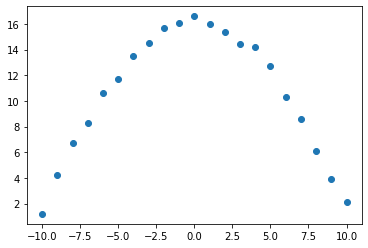

In [2]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
plt.show()

In [3]:
def f1(x, a, b, c):
    return a * x**2 + b * x + c

params, covariance = curve_fit(f1, xdata, ydata)
a, b, c = params
print("The optimal parameters are:")
print("a =",a)
print("b =",b)
print("c =",c)

The optimal parameters are:
a = -0.14771910012434963
b = 0.011168831166674442
c = 16.02589081402427


In [4]:
# test
foo = np.linspace(0,10,30)
bar = 5
f2 = lambda x: x+bar
print(f2(foo))

[ 5.          5.34482759  5.68965517  6.03448276  6.37931034  6.72413793
  7.06896552  7.4137931   7.75862069  8.10344828  8.44827586  8.79310345
  9.13793103  9.48275862  9.82758621 10.17241379 10.51724138 10.86206897
 11.20689655 11.55172414 11.89655172 12.24137931 12.5862069  12.93103448
 13.27586207 13.62068966 13.96551724 14.31034483 14.65517241 15.        ]


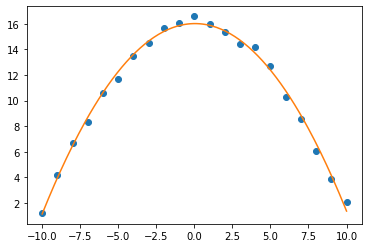

In [5]:
xgrid = np.linspace(-10,10,200)
f3 = lambda x: a * x**2 + b * x + c
ygrid = f3(xgrid)

# Plot data with fitted curve.
plt.plot(xdata, ydata, 'o')
plt.plot(xgrid,ygrid)
plt.show()

# Cable temperature
The equation for our model:<br>
T<sub>cable</sub>(t) = CI(t) + T<sub>soil</sub>

In [6]:
def model_equation(x, c):
    """This function represents the model equation to which we will fit the data.
    Input:
    - x
      Array-like with two elements:
      - x[0] is the current "I" through the cable.
      - x[1] is the soil temperature T_soil.
    - c
      The parameter: the constant "C" from the model equation.

    Output: T_cable"""
    return c * x[0] + x[1]

In [7]:
path_to_data = Path(os.pardir, os.pardir, "modellenpracticum2022-speed-of-heat", "data")

if path_to_data.is_dir():
    print("Confirmed data folder exists.")
# else:
    # TODO handle error.

print(path_to_data)
print()
for subdir in path_to_data.iterdir():
    print(subdir)

Confirmed data folder exists.
..\..\modellenpracticum2022-speed-of-heat\data

..\..\modellenpracticum2022-speed-of-heat\data\1358
..\..\modellenpracticum2022-speed-of-heat\data\2003
..\..\modellenpracticum2022-speed-of-heat\data\20049
..\..\modellenpracticum2022-speed-of-heat\data\20726
..\..\modellenpracticum2022-speed-of-heat\data\22102
..\..\modellenpracticum2022-speed-of-heat\data\2308
..\..\modellenpracticum2022-speed-of-heat\data\2611
..\..\modellenpracticum2022-speed-of-heat\data\2821
..\..\modellenpracticum2022-speed-of-heat\data\3249
..\..\modellenpracticum2022-speed-of-heat\data\3410
..\..\modellenpracticum2022-speed-of-heat\data\3512
..\..\modellenpracticum2022-speed-of-heat\data\3543
..\..\modellenpracticum2022-speed-of-heat\data\weather_cds_data


Trying to load data (didn't yet know about predefined function in preprocess.py)

In [12]:
# Data is formatted like "123,456" but we need point decimal separator instead of comma.
comma_to_point = lambda s: s.replace(',','.').encode()

import pandas as pd

# For every directory that contains all data for one specific cable.
for subdir in path_to_data.iterdir():
    path_to_input_file = subdir / "Power.csv"  # File that contains the current in Ampere.
    if path_to_input_file.is_file():  # Skip the weather folder.
        # TODO the below line doesn't yet give correct result.
        # current = np.genfromtxt(path_to_input_file, skip_header=1, delimiter=';', usecols=2)#, converters={2: comma_to_point})

        current = pd.read_csv(path_to_input_file, usecols=(2,), delimiter=';')
        
        # Testing:
        print(current.shape)
        if current.size > 0:
            print('First entry from "', subdir.name, '" is ', current.iloc[0], sep="")
        else:
            print("empty data array")
    

(36732, 1)
First entry from "1358" is Edm-10-2i-010V201-I    88,9
Name: 0, dtype: object
(109017, 1)
First entry from "2003" is Amvb-10-V161-I    83,68
Name: 0, dtype: object
(82031, 1)
First entry from "20049" is Frk-SS-10-V15-I    8,03
Name: 0, dtype: object
(73190, 1)
First entry from "20726" is Ure-SS-10-V05-I    3,72
Name: 0, dtype: object
(43926, 1)
First entry from "22102" is Tl-10-1-2.60-I    50,4
Name: 0, dtype: object
(152791, 1)
First entry from "2308" is Lmd-10-V.116-I    141,2
Name: 0, dtype: object
(137599, 1)
First entry from "2611" is Alk-10-V137-I    75,41
Name: 0, dtype: object
(14688, 1)
First entry from "2821" is Uhn-10-V157-I    49,17
Name: 0, dtype: object
(0, 1)
empty data array
(36732, 1)
First entry from "3410" is Edm-10-2i-010V201-I    88,9
Name: 0, dtype: object
(108233, 1)
First entry from "3512" is Twy-SS-10-V11-I    36,37
Name: 0, dtype: object
(108238, 1)
First entry from "3543" is Bvw-10-V140-I    106,83
Name: 0, dtype: object
